In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Nadam
from keras import models, layers, optimizers
import matplotlib.image as mpimg
import math
import random
import os

# Set directory paths and initialize parameter

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Plant Dataset (1)'
TRAIN_DIR = os.path.join(BASE_DIR, 'Train')
TEST_DIR = os.path.join(BASE_DIR, 'Test')
BATCH_SIZE = 20
EPOCHS = 30


TRAIN_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255,
                validation_split = 0.2
                )


TEST_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255
                )

In [ ]:
print("TRAINING DATA:")
for i in os.listdir(TRAIN_DIR):
    files = os.listdir(TRAIN_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

print("\n\nTEST DATA:")
for i in os.listdir(TEST_DIR):
    files = os.listdir(TEST_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

TRAINING DATA:
Healthy Plant : 294 files
Unhealthy Plant : 318 files


TEST DATA:
Unhealthy Plant : 76 files
Healthy Plant : 77 files


In [ ]:
train_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (150,150),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='training'
                  )

validation_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (150,150),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='validation'
                  )

test_generator = TEST_DATAGEN.flow_from_directory(
                    TEST_DIR,
                    target_size = (150,150),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical'
                  )

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=2e-5), metrics=['acc'])


In [ ]:
history = model.fit(
                                train_generator,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )



Epoch 1/30
25/25 [==============================] - 199s 7s/step - loss: 0.1105 - acc: 0.9552 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 2/30
25/25 [==============================] - 72s 3s/step - loss: 1.0720e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 3/30
25/25 [==============================] - 69s 3s/step - loss: 4.4937e-05 - acc: 1.0000 - val_loss: 5.5108e-04 - val_acc: 1.0000
Epoch 4/30
25/25 [==============================] - 65s 3s/step - loss: 2.3273e-05 - acc: 1.0000 - val_loss: 3.6609e-04 - val_acc: 1.0000
Epoch 5/30
25/25 [==============================] - 67s 3s/step - loss: 2.2274e-05 - acc: 1.0000 - val_loss: 2.3159e-04 - val_acc: 1.0000
Epoch 6/30
25/25 [==============================] - 72s 3s/step - loss: 1.7501e-05 - acc: 1.0000 - val_loss: 1.5406e-04 - val_acc: 1.0000
Epoch 7/30
25/25 [==============================] - 77s 3s/step - loss: 2.6866e-06 - acc: 1.0000 - val_loss: 1.2521e-04 - val_acc: 1.0000
Epoch 8/30
25/25 [===========================

<ipython-input-12-9bcbdeaa28d4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'bo', label='Validation accuracy', color='red')
<ipython-input-12-9bcbdeaa28d4>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'bo', label='Validation loss', color='red')


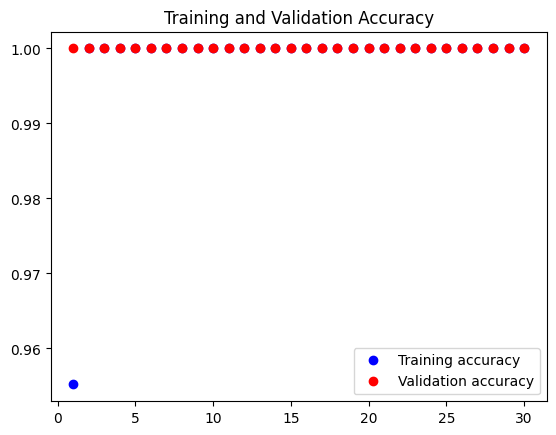

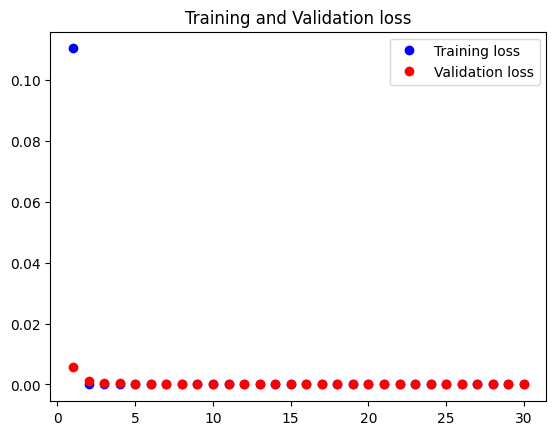

Average Validation accuracy:  1.0
Average Validation loss:  0.0003065677569490314


In [ ]:
def plot_acc():
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc)+1)

    plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation accuracy', color='red')
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation loss', color='red')
    plt.title("Training and Validation loss")
    plt.legend()
    plt.show()

    print("Average Validation accuracy: ", np.mean(val_acc))
    print("Average Validation loss: ", np.mean(val_loss))

plot_acc()

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy: ", test_acc)

8/8 [==============================] - 18s 2s/step - loss: 2.9678e-06 - acc: 1.0000
Test Accuracy:  1.0
